# TME3: introduction à Numpy

> Consignes: le fichier TME3_Sujet.ipynb est à déposer sur le site Moodle de l'UE https://moodle-sciences.upmc.fr/moodle-2018/course/view.php?id=4650. Si vous êtes en binôme, renommez-le en TME3_nom1_nom2.ipynb.

## Exercice 1: 
Implémenter les exemples vu en TD. Imprimer les tableaux résultats pour vérification.

In [1]:
from PIL import Image
import numpy as np
import math
import matplotlib.pylab as plt  

# Exercice 1

l = list(range(100))
#print(l)
t = np.array(l).reshape((10,10))
#print(t)
t.dtype

#print("Le type le plus économique est int8")
t2 = np.array(l,'int8')
t2.dtype
#print(t2)

t3 = t.astype(np.single)
t4 = t.astype(np.double)
#print(t3)
#print(t4)

t.ndim, t.shape, t.size
t5 = np.zeros((1,100),int)
#print(t5)
t6 = np.zeros((20,30), int)
#print(t6)
t7 = np.full((20,30,3),255,int)
#print(t7)

#Exercice 2



def moyenne(t) :
    h,w = t.shape
    s = 0
    for y in range(h) :
        for x in range(w) :
                s += t[y,x]
    return s *1.0 / t.size

moyenne(t)
        
x = np.arange(- math.pi, math.pi, math.pi * 1.0 / 100)
#print("La taille des intervalles est de : "+str(math.pi *1.0 /100)+".\nVoici le tableau : ")
#print(x)

y = np.sin(x)
#print(y)

plt.plot(x,y)
plt.show()

<Figure size 640x480 with 1 Axes>

## Exercice 2: Numpy et les images

### 2.1 Normalisation
Normaliser l'image <tt>img/seiche.png</tt>. Indication: utiliser les méthodes <tt>min()</tt> et <tt>max()</tt> de la classe <tt>ndarray</tt>. Afficher l'image PIL <tt>seiche.png</tt> puis le tableau numpy normalisé. Ps: si l'image numpy apparait colorée, utiliser la fonction gray() qui fixe la palette de couleurs d'<tt>imshow()</tt> en niveaux de gris.

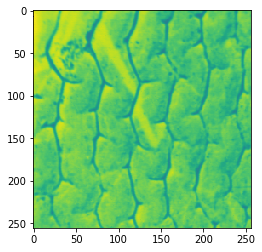

In [2]:
from PIL import Image
from pylab import *

seiche = Image.open("./img/seiche.png")
def normalisation(image) :
    n = np.array(image) 
    t = (n - np.amin(n)) *255 / (np.amax(n) - np.amin(n))
    return t
    
#imshow(seiche)
imshow(normalisation(seiche))


### 2.2 Visualisation PIL et Numpy
Lire l'image <tt>img/CT-scan.png</tt> (une coupe d'une acquisition d'un scanner X d'un corps humain) avec PIL et sa classe <tt>Image</tt>. Imprimer les extremas de l'image et l'image PIL. Transformer-là en tableau Numpy. A nouveau afficher ce tableau sous forme d'image. Que constatez-vous ?

(0, 2244)


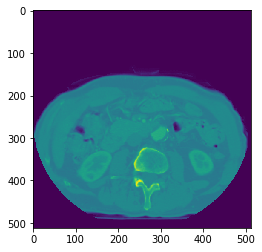

In [4]:
scan = Image.open("./img/CT-scan.png")
scan.getextrema()
imshow(scan)
n = np.array(scan)
imshow(n)

print(scan.getdata().getextrema())
#Nous constatons que l'image est désormais en couleur, et elle est définie. 
#Il est donc possible de bien la distinguer. 

### 2.3 Seuillage
Prendre le tableau numpy de la question précédente. Appliquer un seuillage haut au seuil 255. 
Remarque: cette opération se fait une instruction Python. Afficher le résultat sous forme d'image et comparer avec l'image PIL affichée à la question précédente. Qu'en déduisez vous du comportement de imshow() sur les images PIL ?

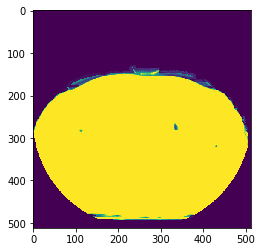

In [6]:
def seuillage(tab, valeur):
    l= tab > valeur
    tab[l]= valeur
    return tab


t = seuillage(n, 255)
imshow(t)

#PIL réécrit par dessus les images.


### 2.4 Seuillage - suite
Sur la même image, appliquer un seuillage à 1000 et commenter la visualisation de l'image seuillée. Essayer d'autres valeurs de seuils pour différentier certains organes.


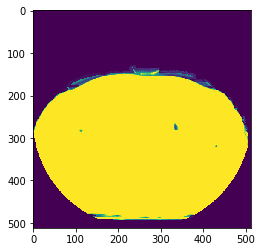

In [7]:
imshow(seuillage(n,1000))
#Le jaune a recouvert la tache.

im = Image.open("./img/CT-scan.png")
imn = np.array(im)
imshow(seuillage(imn,255))

### 2.4 Damier
Comment fabriquer un image qui représente un damier (alternance de 6 cases blanches et 6 cases noires en ligne et en colonne), chaque case étant de taille 20 par 20. On pourra utiliser les fonctions <tt>hstack()</tt>, <tt>vstack()</tt> et <tt>tile()</tt>.

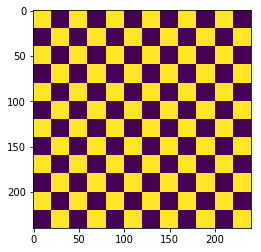

In [8]:
def damier() :
    #on crée une case blanche et une case noir.
    noir = zeros((20,20), int)
    blanc = full((20,20), 255, int)
    #concaténer les cases pour former les 2 types de lignes différentes.
    ligne1 = np.tile(np.hstack((blanc,noir)),6)
    ligne2 = np.tile(np.hstack((noir, blanc)),6)
    #concaténer les lignes. 
    l = np.tile((ligne1, ligne2), (6,1,1))
    return np.vstack((l))

imshow(damier())



## Exercice 3: Manipulation et parcours de tableaux
### 3.1 Permutation de colonnes
Écrire un code Python qui créé un tableau <tt>A</tt> initialisé à des valeurs quelconque, ou bien une image lue sur le disque, construit un tableau <tt>B</tt> de même taille qui contient en première colonne la dernière colonne de <tt>A</tt>, et pour ses colonnes restantes, les premières colonnes de <tt>A</tt>. 


In [9]:
def permutation(A) :
    B  = A.copy()
    B[:,0] = A[:,-1]
    B[:,-1] = A[:,0]
    return B

im = Image.open("./img/CT-scan.png")
imn = np.array(im)
#imshow(np.hstack((permutation(imn), imn)))

t = np.array(range(100))

t = t.reshape((10,10))

print(permutation(t))

    

[[ 9  1  2  3  4  5  6  7  8  0]
 [19 11 12 13 14 15 16 17 18 10]
 [29 21 22 23 24 25 26 27 28 20]
 [39 31 32 33 34 35 36 37 38 30]
 [49 41 42 43 44 45 46 47 48 40]
 [59 51 52 53 54 55 56 57 58 50]
 [69 61 62 63 64 65 66 67 68 60]
 [79 71 72 73 74 75 76 77 78 70]
 [89 81 82 83 84 85 86 87 88 80]
 [99 91 92 93 94 95 96 97 98 90]]


### 3.2 Duplication de lignes et colonnes
Écrire un code Python qui prend le même tableau <tt>A</tt>, créé un tableau <tt>A2</tt> ayant 2 lignes et deux colonnes de plus que <tt>A</tt> et telque :
 - <tt>A2</tt> privé de ses premières et dernières lignes et colonnes doit valoir <tt>A</tt>. 
 - Les bords de <tt>A2</tt> doivent correspondre aux bords de <tt>A</tt>. Les valeurs aux coins de A2 ne devraient pas vous poser de problème !


In [10]:
def duplication(tab) :
    h, w = tab.shape
    h2 = h +2
    w2 = w +2
    A2 = np.ones((h2,w2),tab.dtype)
        
    #Remplissage des colonnes
    for i in range(h) :
        A2[i+1, 0] = tab[i,0]
        A2[i+1:i+2, 1:11] = tab[i:i+1]
        A2[i+1, w+1] = tab[i,w-1]
    #Remplissage des lignes    
    for j in range(w) :
        A2[0,j+1] = tab[0,j]
        A2[h+1,j+1] = tab[h-1, j]
    #Remplissage des valeurs en coin
    A2[0,0] = tab[0,0]
    A2[h2-1,0] = tab[h-1, 0]
    A2[h2-1,w2-1] = tab[h-1, w-1]
    A2[0, w2-1] = tab[0, w-1]

    return A2
                 
print(duplication(t))


[[ 0  0  1  2  3  4  5  6  7  8  9  9]
 [ 0  0  1  2  3  4  5  6  7  8  9  9]
 [10 10 11 12 13 14 15 16 17 18 19 19]
 [20 20 21 22 23 24 25 26 27 28 29 29]
 [30 30 31 32 33 34 35 36 37 38 39 39]
 [40 40 41 42 43 44 45 46 47 48 49 49]
 [50 50 51 52 53 54 55 56 57 58 59 59]
 [60 60 61 62 63 64 65 66 67 68 69 69]
 [70 70 71 72 73 74 75 76 77 78 79 79]
 [80 80 81 82 83 84 85 86 87 88 89 89]
 [90 90 91 92 93 94 95 96 97 98 99 99]
 [90 90 91 92 93 94 95 96 97 98 99 99]]


### 3.3 Temps de calcul
Reprendre l'exercice 2 du TME2 en utilisant Numpy: calculer les extremas d'un tableau numpy (de grande taille, par exemple l'image <tt>../TME2/img/genies-math.jpg</tt> convertie en niveaux de gris), en parcourant par indice les valeurs du tableau. Puis utiliser les méthodes <tt>min()</tt> et <tt>max()</tt>. Chronométrer les temps grâce aux fonctions <tt>tic()</tt> et <tt>tac()</tt>. Discuter ces temps.

In [11]:
from time import process_time
mytime = 0

def tic():
    global mytime
    mytime = process_time()
def tac():
    global mytime
    print (process_time()-mytime)
    mytime = process_time()

###
math = Image.open("../TME2/img/genies-math.jpg").convert('L')
mathtab = np.array(math)
print(mathtab.shape)
def extrema(tab) :
    
    (h,w) = tab.shape
    mini = tab[0,0]
    maxi = tab[0,0]
    for i in range(h) :
        for j in range(w) :
            p = tab[i,j]
            if (p > maxi ) :
                maxi = p
            if(p < mini ) :
                mini = p
    return mini, maxi
tic()
print(mathtab.max())
print(mathtab.min())
tac()

tic()
print(extrema(mathtab))
tac()



(3120, 4160)
255
0
0.12391400000000097
(0, 255)
9.341785999999999


<p>Notre méthode prend 80 fois plus de temps que la méthode définie par numpy, cela est probablement du au parcours par indice d'un tableau qui est très long. Notre méthode n'est définitivement pas optimale.